# A4: Common Analysis

In this analysis, we will explore if a mask mandate is effective in reducing the spread of COVID-19.

## Data Loading

In this section, we import library and load data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_cases = pd.read_csv("RAW_us_confirmed_cases.csv")  # covid cases count by day and county
covid_mandate = pd.read_csv("covid_mandate.csv")  # covid mandate status by day and county
covid_volunteer = pd.read_csv("mask-use-by-county.csv")  # covid mask wearing frequency by county

In [3]:
covid_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408


In [4]:
covid_mandate.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [5]:
covid_volunteer.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [6]:
# Find Fulton County Data
covid_cases_filtered = covid_cases[(covid_cases['Admin2']=='Fulton') & (covid_cases['Province_State']=='Georgia')]

In [7]:
covid_mandate_filtered = covid_mandate[(covid_mandate['County_Name']=='Fulton County')&(covid_mandate['State_Tribe_Territory']=='GA')]

In [8]:
covid_cases_filtered.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
470,Georgia,Fulton,84013121,US,USA,840,13121.0,US,33.792169,-84.463194,...,131261,131261,131476,131559,131658,131781,131898,131898,131898,132103


In [9]:
## dates only from to 04/10 to 08/15, inclusive
print(covid_mandate_filtered.head())
print(covid_mandate_filtered.shape)

       State_Tribe_Territory    County_Name  FIPS_State  FIPS_County  \
118636                    GA  Fulton County          13          121   
118637                    GA  Fulton County          13          121   
118638                    GA  Fulton County          13          121   
118639                    GA  Fulton County          13          121   
118640                    GA  Fulton County          13          121   

             date  order_code Face_Masks_Required_in_Public Source_of_Action  \
118636  4/10/2020           2                           NaN              NaN   
118637  4/11/2020           2                           NaN              NaN   
118638  4/12/2020           2                           NaN              NaN   
118639  4/13/2020           2                           NaN              NaN   
118640  4/14/2020           2                           NaN              NaN   

        URL Citation  
118636  NaN      NaN  
118637  NaN      NaN  
118638  NaN      

## Data Preprocessing

In this section, we process the data by finding covid cases counts and merging tables.

In [10]:
# get aggregated infection count
covid_cases_unpivot=pd.melt(covid_cases_filtered, id_vars=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], var_name='date', value_name='infected')

In [11]:
# string processing for joining tables
covid_cases_by_date = covid_cases_unpivot[['date', 'infected']]
covid_mandate_by_date = covid_mandate_filtered[['date','order_code']]
covid_mandate_by_date['date'] = covid_mandate_by_date['date'].apply(lambda x: x[:-4]+x[-2:])

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
covid_cases_and_mandate = covid_cases_by_date.merge(covid_mandate_by_date, how='left', on='date')

In [13]:
covid_cases_and_mandate.head()

,date,infected,order_code
0,1/22/20,0,NaN
1,1/23/20,0,NaN
2,1/24/20,0,NaN
3,1/25/20,0,NaN
4,1/26/20,0,NaN


## Data Analysis: Fulton County

In this section, we plot the infection rates of Fulton County and see if there are any differences with or without mask mandates.

In [14]:
dates = pd.date_range('2020-02-01', '2021-10-15')

In [15]:
fulton_population = 1064000
cumulative_infected = list(covid_cases_and_mandate['infected'])
cumulative_infected = [x/fulton_population for x in cumulative_infected]

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


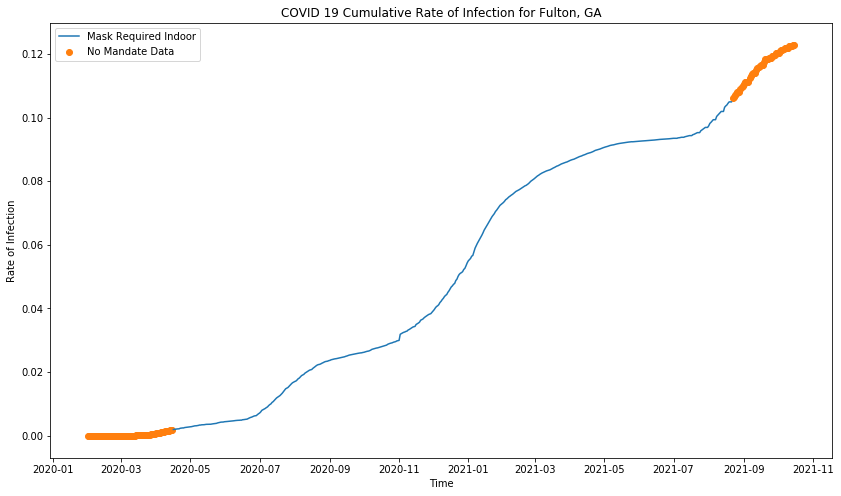

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates)[75:-55], cumulative_infected[11+75:-16-55], color='C0', label='Mask Required Indoor')
plt.scatter(list(dates)[:75]+list(dates)[-55:], cumulative_infected[11:11+75]+cumulative_infected[-16-55:-16], c='C1', label='No Mandate Data')

plt.title("COVID 19 Cumulative Rate of Infection for Fulton, GA")
plt.xlabel("Time")
plt.ylabel("Rate of Infection")
plt.legend()

In [17]:
daily_infected = [cumulative_infected[i]-cumulative_infected[i-1] for i in range(1,len(cumulative_infected))]

In [18]:
daily_infected_smoothed = [sum(daily_infected[i-7:i])/7 for i in range(7,len(daily_infected))]

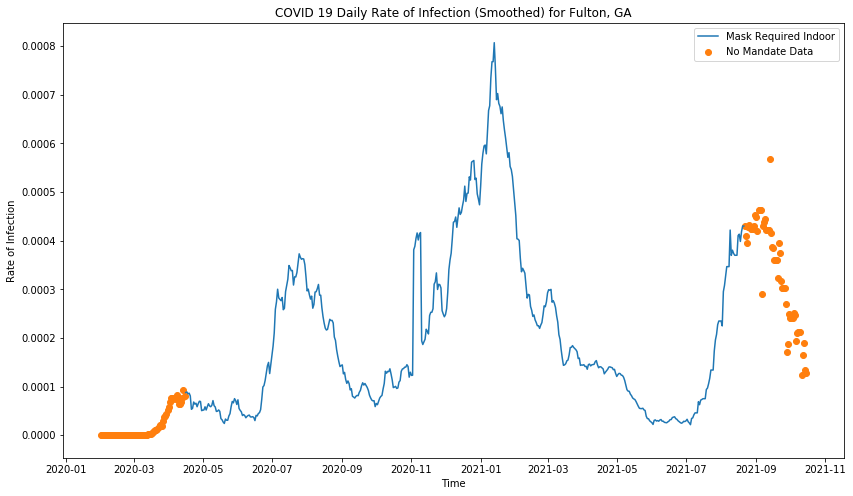

In [19]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates)[75:-55], daily_infected_smoothed[3+75:-16-55], color='C0', label='Mask Required Indoor')
plt.scatter(list(dates)[:75]+list(dates)[-55:], daily_infected_smoothed[3:3+75]+daily_infected_smoothed[-16-55:-16], c='C1', label='No Mandate Data')

plt.title("COVID 19 Daily Rate of Infection (Smoothed) for Fulton, GA")
plt.xlabel("Time")
plt.ylabel("Rate of Infection")
plt.legend()

## Data Analysis: Fulton County vs. Valley County

In this section, we compare Fulton County's data with Valley County because Valley county has low mask wearing rate based on the mask wearing survey.

In [20]:
covid_volunteer[covid_volunteer['COUNTYFP']==13121]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
446,13121,0.026,0.036,0.089,0.187,0.662


In [21]:
covid_volunteer.sort_values('ALWAYS')

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1650,30105,0.172,0.235,0.187,0.291,0.115
1607,30019,0.172,0.244,0.186,0.269,0.129
1625,30055,0.142,0.274,0.179,0.267,0.139
1640,30085,0.169,0.246,0.178,0.261,0.146
1633,30071,0.229,0.114,0.214,0.296,0.147
...,...,...,...,...,...,...
2593,48141,0.007,0.007,0.033,0.075,0.877
211,6051,0.011,0.026,0.012,0.070,0.880
2637,48229,0.013,0.003,0.076,0.029,0.880
1889,36123,0.000,0.006,0.023,0.087,0.884


In [22]:
covid_volunteer_filtered = covid_volunteer[(covid_volunteer['COUNTYFP']==13121)|(covid_volunteer['COUNTYFP']==30105)]

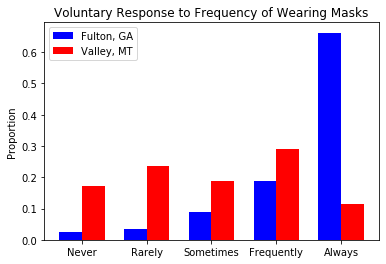

In [23]:
fulton = [0.026, 0.036, 0.089, 0.187, 0.662]
valley = [0.172, 0.235, 0.187, 0.291, 0.115]

ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fulton, width, color='b')
rects2 = ax.bar(ind+width, valley, width, color='r')

ax.set_ylabel('Proportion')
ax.set_title('Voluntary Response to Frequency of Wearing Masks')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Never', 'Rarely', 'Sometimes', 'Frequently', 'Always'))

ax.legend((rects1[0], rects2[0]), ('Fulton, GA', 'Valley, MT'))

In [24]:
covid_cases_valley = covid_cases[(covid_cases['Admin2']=='Valley') & (covid_cases['Province_State']=='Montana')]
covid_mandate_valley = covid_mandate[(covid_mandate['County_Name']=='Valley County')&(covid_mandate['State_Tribe_Territory']=='MT')]

In [25]:
covid_cases_valley.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
1714,Montana,Valley,84030105,US,USA,840,30105.0,US,48.364351,-106.666963,...,1244,1244,1244,1254,1254,1254,1268,1268,1268,1276


In [26]:
covid_mandate_valley.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
438900,MT,Valley County,30,105,4/10/2020,2,NaN,NaN,NaN,NaN
438901,MT,Valley County,30,105,4/11/2020,2,NaN,NaN,NaN,NaN
438902,MT,Valley County,30,105,4/12/2020,2,NaN,NaN,NaN,NaN
438903,MT,Valley County,30,105,4/13/2020,2,NaN,NaN,NaN,NaN
438904,MT,Valley County,30,105,4/14/2020,2,NaN,NaN,NaN,NaN


In [27]:
covid_cases_unpivot_valley=pd.melt(covid_cases_valley, id_vars=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], var_name='date', value_name='infected')

In [28]:
covid_cases_by_date_valley = covid_cases_unpivot_valley[['date', 'infected']]
covid_mandate_by_date_valley = covid_mandate_valley[['date','order_code']]
covid_mandate_by_date_valley['date'] = covid_mandate_by_date_valley['date'].apply(lambda x: x[:-4]+x[-2:])

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
covid_cases_and_mandate_valley = covid_cases_by_date_valley.merge(covid_mandate_by_date_valley, how='left', on='date')

In [30]:
cumulative_infected_valley = list(covid_cases_and_mandate_valley['infected'])
cumulative_infected_valley = [x/7471 for x in cumulative_infected_valley]

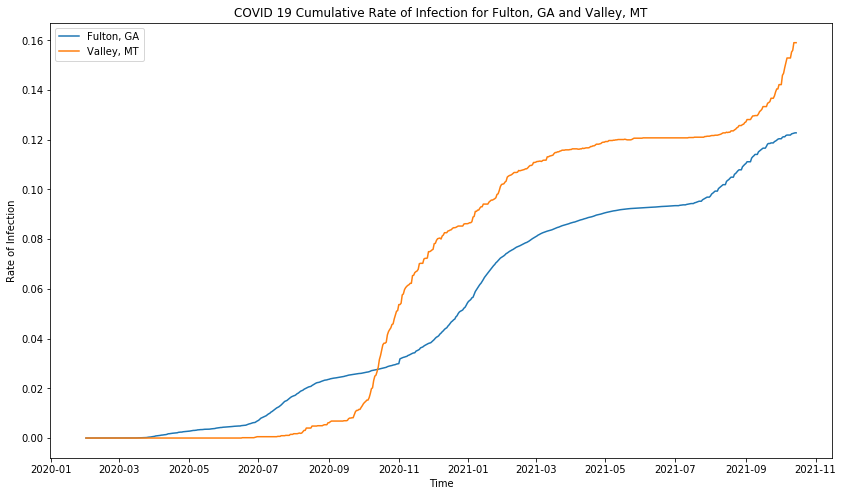

In [31]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates), cumulative_infected[11:-16], color='C0', label='Fulton, GA')
plt.plot(list(dates), cumulative_infected_valley[11:-16], color='C1', label='Valley, MT')

plt.title("COVID 19 Cumulative Rate of Infection for Fulton, GA and Valley, MT")
plt.xlabel("Time")
plt.ylabel("Rate of Infection")
plt.legend()

In [32]:
daily_infected_valley = [cumulative_infected_valley[i]-cumulative_infected_valley[i-1] for i in range(1,len(cumulative_infected_valley))]
daily_infected_smoothed_valley = [sum(daily_infected_valley[i-7:i])/7 for i in range(7,len(daily_infected_valley))]

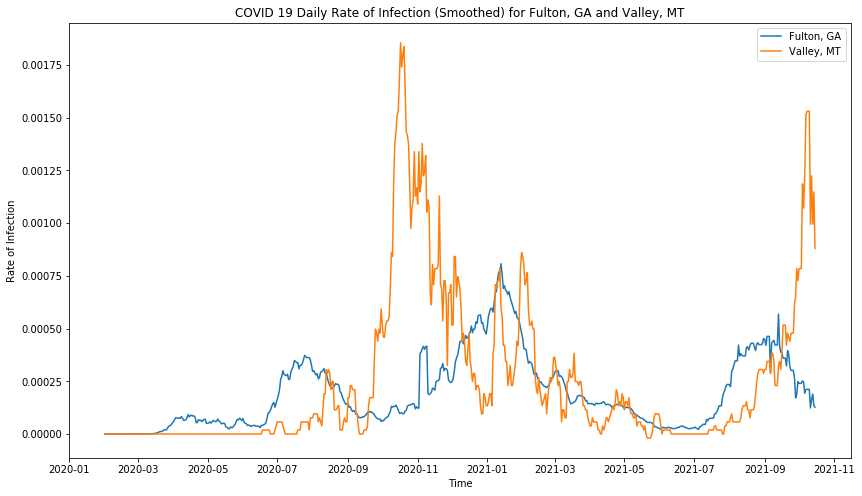

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates), daily_infected_smoothed[3:-16], color='C0', label='Fulton, GA')
plt.plot(list(dates), daily_infected_smoothed_valley[3:-16], color='C1', label='Valley, MT')

plt.title("COVID 19 Daily Rate of Infection (Smoothed) for Fulton, GA and Valley, MT")
plt.xlabel("Time")
plt.ylabel("Rate of Infection")
plt.legend()